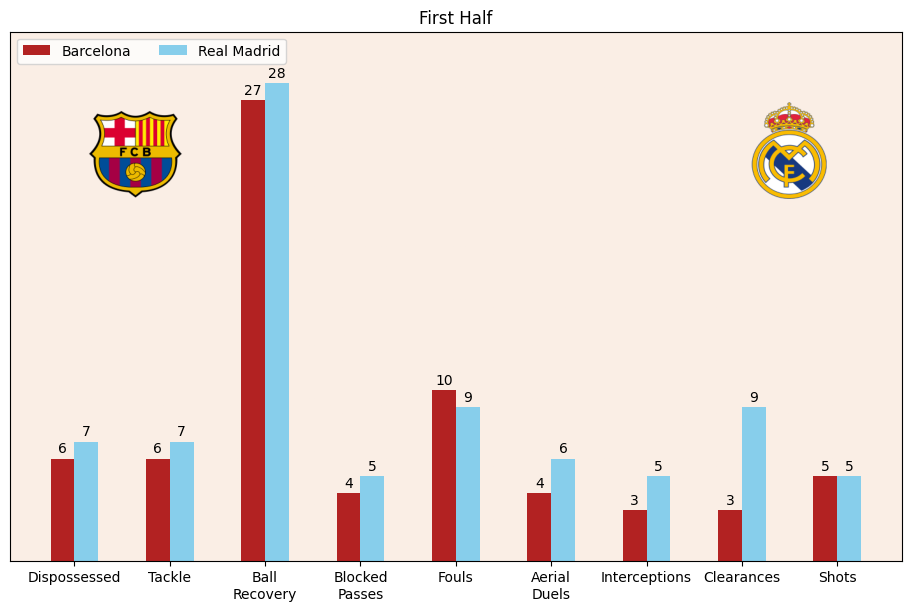

In [41]:
import json
import matplotlib.pyplot as plt
import numpy as np
from main_data import main_content, data as fotmob_data


shots_data = main_content['shotmap']['shots']

with open('../../data/whoscored/data.json', 'r') as file:
    data = json.load(file)

events = data['matchCentreData']['events']
home_id = data['matchCentreData']['home']['teamId']
away_id = data['matchCentreData']['away']['teamId']
home_id_fotmob = fotmob_data['props']['pageProps']['general']['homeTeam']['id']
away_id_fotmob = fotmob_data['props']['pageProps']['general']['awayTeam']['id']


def get_shots_stat(teamId: int, minute: list):
    return list(filter(lambda x: (
        x['teamId'] == teamId
        and x['min'] >= minute[0]
        and x['min'] <= minute[1]
    ), shots_data))


def get_stat_by_type(teamId: int, minute: list, statType: str):
    return list(filter(lambda x: (
        x['type']['displayName'] == statType
        and x['teamId'] == teamId
        and x['outcomeType']['value'] == 1
        and x['minute'] >= minute[0]
        and x['minute'] <= minute[1]
    ), events))


stats_label = ('Dispossessed', 'Tackle', 'Ball\nRecovery',
               'Blocked\nPasses', 'Fouls', 'Aerial\nDuels', 'Interceptions', 'Clearances', 'Shots')
stats = ('Dispossessed', 'Tackle', 'BallRecovery',
         'BlockedPass', 'Foul', 'Aerial', 'Interception', 'Clearance')


def show_stat_by_interval(labels: tuple, data: dict, title: str, limit: int):
    img = plt.imread('./bg.png')
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0
    fig, ax = plt.subplots(figsize=(9, 6), layout='constrained')
    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width,
                       label=attribute, color='firebrick' if attribute == 'Barcelona' else 'skyblue')
        ax.bar_label(rects, padding=2)
        multiplier += 1
    ax.set_yticks([])
    ax.set_title(title)
    ax.set_xticks(x + width / 2, labels)
    ax.legend(loc='upper left', ncols=2)
    ax.set_ylim(0, limit)
    ax.imshow(img, extent=[ax.get_xlim()[0], ax.get_xlim()[
              1], ax.get_ylim()[0], ax.get_ylim()[1]], aspect='auto')

    plt.show()


# First half


first_half_stat = {
    'Barcelona': [],
    'Real Madrid': []
}
for el in stats:
    first_half_stat['Barcelona'].append(
        len(get_stat_by_type(home_id, [0, 45], el)))
    first_half_stat['Real Madrid'].append(
        len(get_stat_by_type(away_id, [0, 45], el)))

first_half_stat['Barcelona'].append(
    len(get_shots_stat(home_id_fotmob, [0, 45])))

first_half_stat['Real Madrid'].append(
    len(get_shots_stat(away_id_fotmob, [0, 45])))


show_stat_by_interval(labels=stats_label,
                      data=first_half_stat,
                      title='First Half',
                      limit=max(max(values) for values in first_half_stat.values()) + 3)

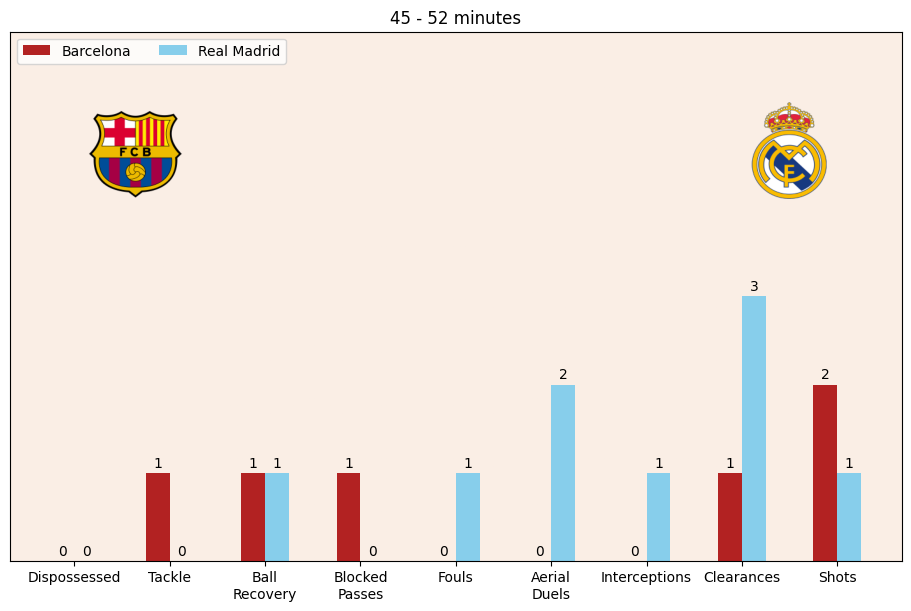

In [42]:
# 45-52 minutes stat
second_interval_stat = {
    'Barcelona': [],
    'Real Madrid': []
}
for el in stats:
    second_interval_stat['Barcelona'].append(
        len(get_stat_by_type(home_id, [46, 52], el)))
    second_interval_stat['Real Madrid'].append(
        len(get_stat_by_type(away_id, [46, 52], el)))


second_interval_stat['Barcelona'].append(
    len(get_shots_stat(home_id_fotmob, [46, 52])))

second_interval_stat['Real Madrid'].append(
    len(get_shots_stat(away_id_fotmob, [46, 52])))


show_stat_by_interval(labels=stats_label,
                      data=second_interval_stat,
                      title='45 - 52 minutes',
                      limit=max(max(values) for values in second_interval_stat.values()) + 3)

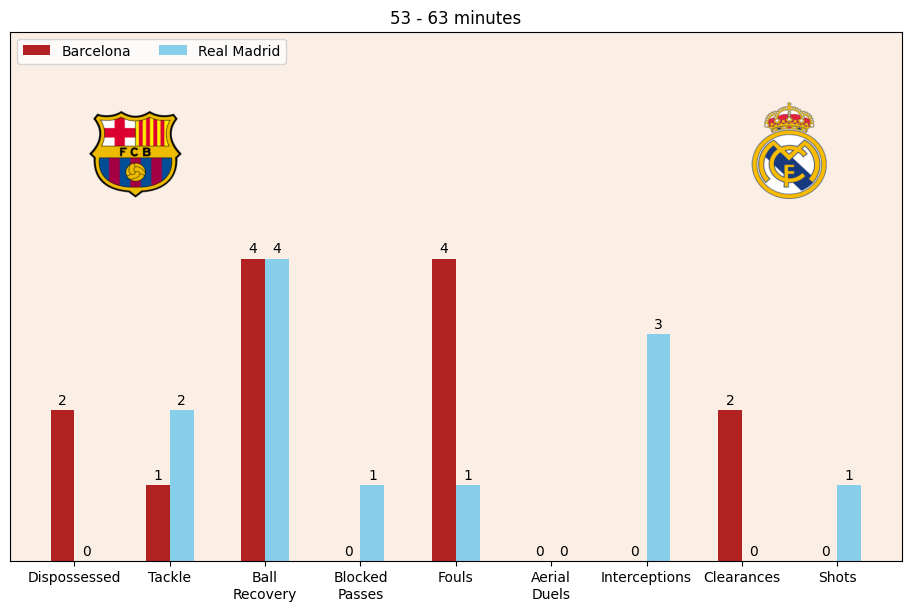

In [43]:
# 53-63 minutes stat
third_interval_stat = {
    'Barcelona': [],
    'Real Madrid': []
}
for el in stats:
    third_interval_stat['Barcelona'].append(
        len(get_stat_by_type(home_id, [53, 63], el)))
    third_interval_stat['Real Madrid'].append(len(get_stat_by_type(
        away_id, [53, 63], el)))

third_interval_stat['Barcelona'].append(
    len(get_shots_stat(home_id_fotmob, [53, 63])))

third_interval_stat['Real Madrid'].append(
    len(get_shots_stat(away_id_fotmob, [53, 63])))

show_stat_by_interval(labels=stats_label,
                      data=third_interval_stat,
                      title='53 - 63 minutes',
                      limit=max(max(values) for values in third_interval_stat.values()) + 3)

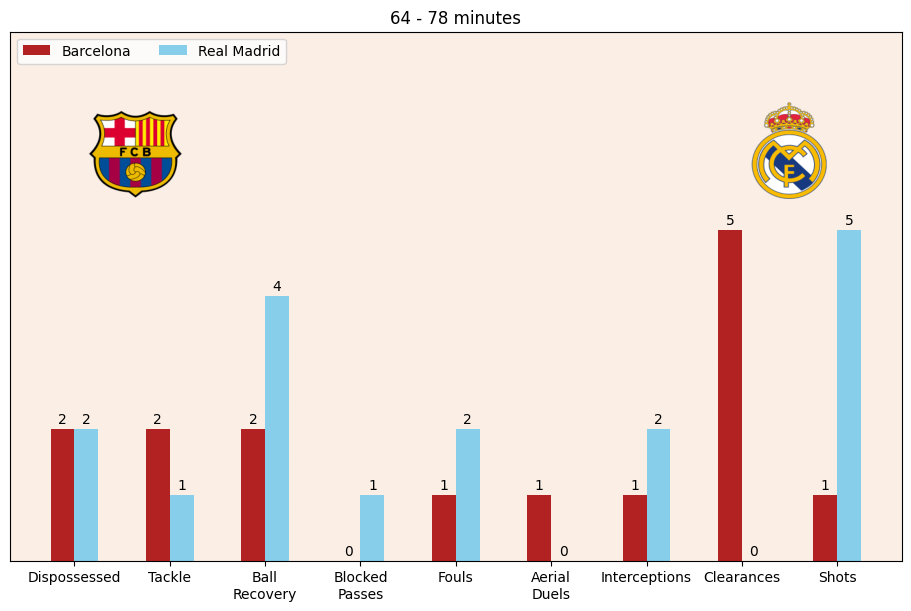

In [44]:
# 64-78 minutes stat
forth_interval_stat = {
    'Barcelona': [],
    'Real Madrid': []
}
for el in stats:
    forth_interval_stat['Barcelona'].append(len(get_stat_by_type(
        home_id, [64, 78], el)))
    forth_interval_stat['Real Madrid'].append(len(get_stat_by_type(
        away_id, [64, 78], el)))

forth_interval_stat['Barcelona'].append(
    len(get_shots_stat(home_id_fotmob, [64, 78])))

forth_interval_stat['Real Madrid'].append(
    len(get_shots_stat(away_id_fotmob, [64, 78])))

show_stat_by_interval(labels=stats_label,
                      data=forth_interval_stat,
                      title='64 - 78 minutes',
                      limit=max(max(values) for values in forth_interval_stat.values()) + 3)

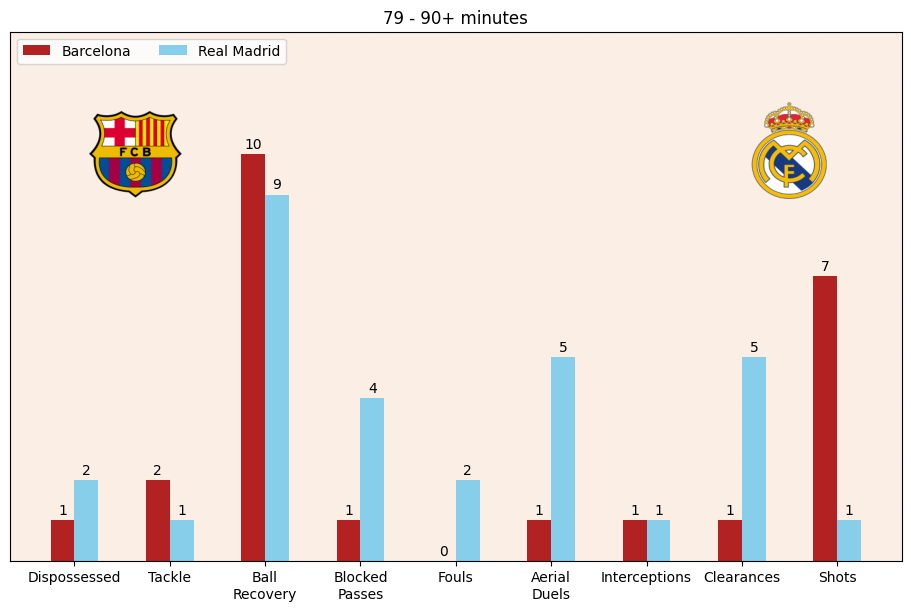

In [46]:
# Final interval
final_interval_stat = {
    'Barcelona': [],
    'Real Madrid': []
}
for el in stats:
    final_interval_stat['Barcelona'].append(len(get_stat_by_type(
        home_id, [79, 100], el)))
    final_interval_stat['Real Madrid'].append(len(get_stat_by_type(
        away_id, [79, 100], el)))

final_interval_stat['Barcelona'].append(
    len(get_shots_stat(home_id_fotmob, [79, 100])))

final_interval_stat['Real Madrid'].append(
    len(get_shots_stat(away_id_fotmob, [79, 100])))


show_stat_by_interval(labels=stats_label,
                      data=final_interval_stat,
                      title='79 - 90+ minutes',
                      limit=max(max(values) for values in final_interval_stat.values()) + 3)